In [ ]:
**Objective:** Predict patient recovery index based on therapy hours, health scores, lifestyle, sleep, and follow-up sessions.

## 1. Import Required Libraries

In [1]:
# Data manipulation and analysis
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


## 2. Load the Dataset

In [2]:
# Load training and test datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

print("📊 Dataset loaded successfully!")
print(f"\nTraining set shape: {train_df.shape}")
print(f"Test set shape: {test_df.shape}")
print(f"Sample submission shape: {sample_submission.shape}")

📊 Dataset loaded successfully!

Training set shape: (8000, 7)
Test set shape: (2000, 6)
Sample submission shape: (3, 2)


## 3. Exploratory Data Analysis (EDA)

### 3.1 Initial Data Inspection

In [3]:
# Display first few rows
print("=" * 80)
print("FIRST 10 ROWS OF TRAINING DATA")
print("=" * 80)
display(train_df.head(10))

FIRST 10 ROWS OF TRAINING DATA


,Id,Therapy Hours,Initial Health Score,Lifestyle Activities,Average Sleep Hours,Follow-Up Sessions,Recovery Index
0,9255,5,49,No,7,5,36
1,1562,2,48,Yes,7,6,25
2,1671,2,81,No,7,2,59
3,6088,2,46,No,6,1,22
4,6670,8,47,No,9,0,40
5,5934,3,56,No,4,4,33
6,8830,3,51,Yes,4,1,30
7,7946,9,93,Yes,5,2,89
8,3509,4,61,Yes,6,5,46
9,2003,4,96,Yes,8,0,83


In [4]:
# Data info
print("=" * 80)
print("DATA INFORMATION")
print("=" * 80)
train_df.info()
print("\n" + "=" * 80)
print("COLUMN NAMES")
print("=" * 80)
print(train_df.columns.tolist())

DATA INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Id                    8000 non-null   int64 
 1   Therapy Hours         8000 non-null   int64 
 2   Initial Health Score  8000 non-null   int64 
 3   Lifestyle Activities  8000 non-null   object
 4   Average Sleep Hours   8000 non-null   int64 
 5   Follow-Up Sessions    8000 non-null   int64 
 6   Recovery Index        8000 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 437.6+ KB

COLUMN NAMES
['Id', 'Therapy Hours', 'Initial Health Score', 'Lifestyle Activities', 'Average Sleep Hours', 'Follow-Up Sessions', 'Recovery Index']


In [5]:
# Basic statistics
print("=" * 80)
print("DESCRIPTIVE STATISTICS")
print("=" * 80)
display(train_df.describe())

DESCRIPTIVE STATISTICS


,Id,Therapy Hours,Initial Health Score,Average Sleep Hours,Follow-Up Sessions,Recovery Index
count,8000.00,8000.00,8000.00,8000.00,8000.00,8000.00
mean,5012.51,4.98,69.53,6.54,4.62,55.31
std,2887.65,2.59,17.34,1.70,2.86,19.20
min,2.00,1.00,40.00,4.00,0.00,10.00
25%,2512.75,3.00,54.75,5.00,2.00,40.00
50%,5014.50,5.00,70.00,7.00,5.00,55.00
75%,7505.25,7.00,85.00,8.00,7.00,71.00
max,10000.00,9.00,99.00,9.00,9.00,100.00


In [6]:
# Check for missing values
print("=" * 80)
print("MISSING VALUES CHECK")
print("=" * 80)
missing_values = train_df.isnull().sum()
print(missing_values)
print(f"\n✅ Total missing values: {missing_values.sum()}")

MISSING VALUES CHECK
Id                      0
Therapy Hours           0
Initial Health Score    0
Lifestyle Activities    0
Average Sleep Hours     0
Follow-Up Sessions      0
Recovery Index          0
dtype: int64

✅ Total missing values: 0


In [7]:
# Check for duplicates
print("=" * 80)
print("DUPLICATE CHECK")
print("=" * 80)
duplicates = train_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

DUPLICATE CHECK
Number of duplicate rows: 0


In [8]:
# Analyze categorical variable
print("=" * 80)
print("LIFESTYLE ACTIVITIES DISTRIBUTION")
print("=" * 80)
lifestyle_counts = train_df['Lifestyle Activities'].value_counts()
print(lifestyle_counts)
print(f"\nPercentage distribution:")
print(train_df['Lifestyle Activities'].value_counts(normalize=True) * 100)

LIFESTYLE ACTIVITIES DISTRIBUTION
Lifestyle Activities
No     4043
Yes    3957
Name: count, dtype: int64

Percentage distribution:
Lifestyle Activities
No     50.54
Yes    49.46
Name: proportion, dtype: float64


### 3.2 Target Variable Analysis

In [9]:
# Target variable statistics
print("=" * 80)
print("TARGET VARIABLE: RECOVERY INDEX")
print("=" * 80)
print(train_df['Recovery Index'].describe())
print(f"\nSkewness: {train_df['Recovery Index'].skew():.4f}")
print(f"Kurtosis: {train_df['Recovery Index'].kurtosis():.4f}")

TARGET VARIABLE: RECOVERY INDEX
count    8000.00
mean       55.31
std        19.20
min        10.00
25%        40.00
50%        55.00
75%        71.00
max       100.00
Name: Recovery Index, dtype: float64

Skewness: 0.0011
Kurtosis: -0.8679


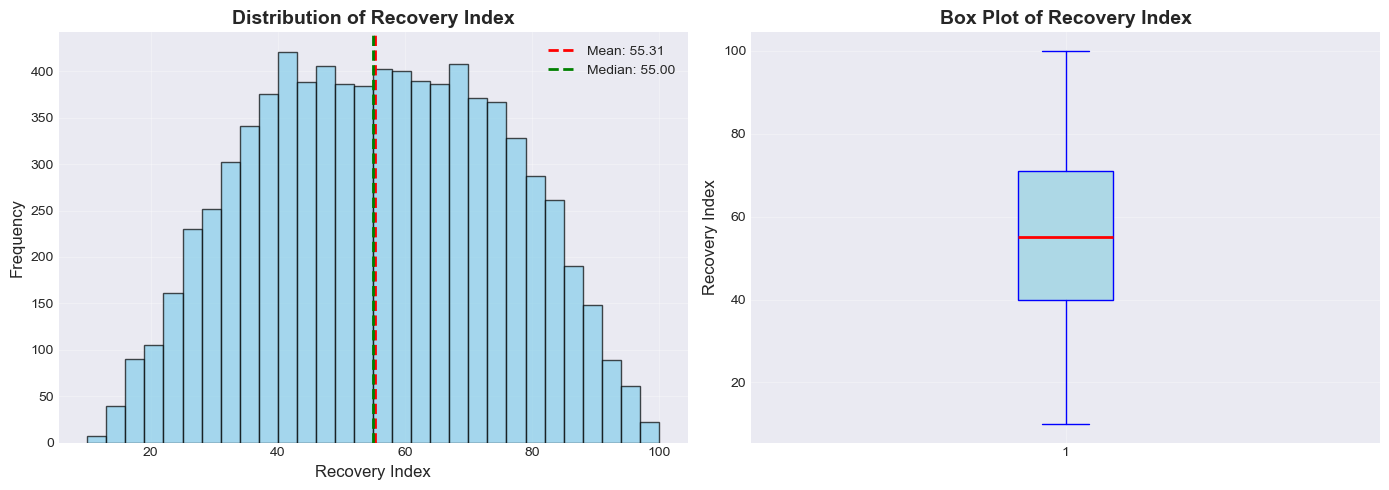

In [10]:
# Visualize target variable distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(train_df['Recovery Index'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Recovery Index', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of Recovery Index', fontsize=14, fontweight='bold')
axes[0].axvline(train_df['Recovery Index'].mean(), color='red', linestyle='--', 
                linewidth=2, label=f'Mean: {train_df["Recovery Index"].mean():.2f}')
axes[0].axvline(train_df['Recovery Index'].median(), color='green', linestyle='--', 
                linewidth=2, label=f'Median: {train_df["Recovery Index"].median():.2f}')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Box plot
axes[1].boxplot(train_df['Recovery Index'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightblue', color='blue'),
                medianprops=dict(color='red', linewidth=2),
                whiskerprops=dict(color='blue'),
                capprops=dict(color='blue'))
axes[1].set_ylabel('Recovery Index', fontsize=12)
axes[1].set_title('Box Plot of Recovery Index', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

### 3.3 Feature Distributions

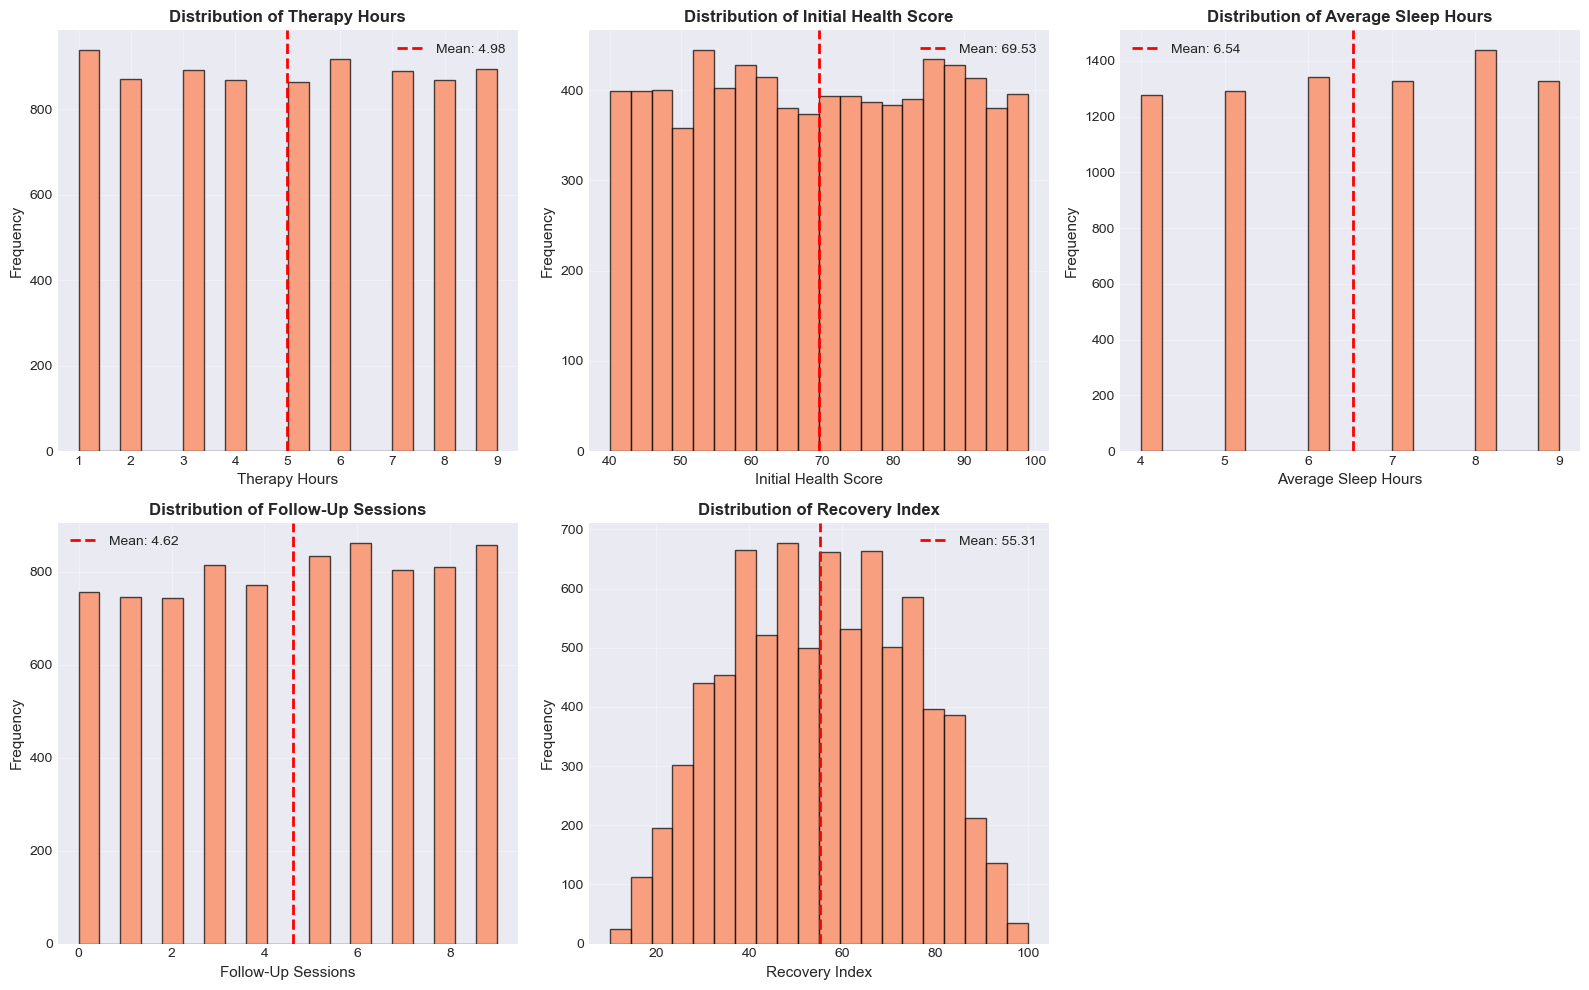

In [11]:
# Distribution of all numerical features
numerical_features = ['Therapy Hours', 'Initial Health Score', 'Average Sleep Hours', 
                      'Follow-Up Sessions', 'Recovery Index']

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for idx, col in enumerate(numerical_features):
    axes[idx].hist(train_df[col], bins=20, color='coral', edgecolor='black', alpha=0.7)
    axes[idx].set_xlabel(col, fontsize=11)
    axes[idx].set_ylabel('Frequency', fontsize=11)
    axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[idx].axvline(train_df[col].mean(), color='red', linestyle='--', 
                     linewidth=2, label=f'Mean: {train_df[col].mean():.2f}')
    axes[idx].legend()
    axes[idx].grid(alpha=0.3)

# Remove extra subplot
axes[-1].axis('off')

plt.tight_layout()
plt.show()

### 3.4 Correlation Analysis

CORRELATION WITH RECOVERY INDEX
Recovery Index          1.00
Initial Health Score    0.91
Therapy Hours           0.38
Average Sleep Hours     0.04
Follow-Up Sessions      0.04
Lifestyle Activities    0.02
Name: Recovery Index, dtype: float64


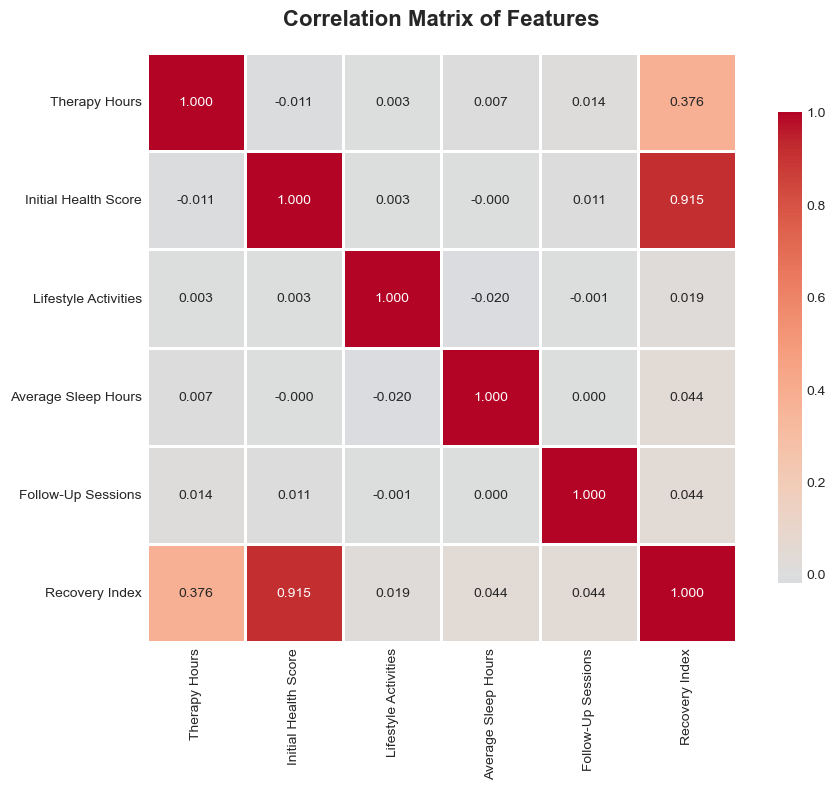

In [12]:
# Create a copy and encode categorical variable for correlation
train_encoded = train_df.copy()
train_encoded['Lifestyle Activities'] = (train_encoded['Lifestyle Activities'] == 'Yes').astype(int)

# Calculate correlation matrix
correlation_matrix = train_encoded.drop('Id', axis=1).corr()

# Display correlation with target
print("=" * 80)
print("CORRELATION WITH RECOVERY INDEX")
print("=" * 80)
target_corr = correlation_matrix['Recovery Index'].sort_values(ascending=False)
print(target_corr)

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.3f', square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

### 3.5 Bivariate Analysis - Features vs Target

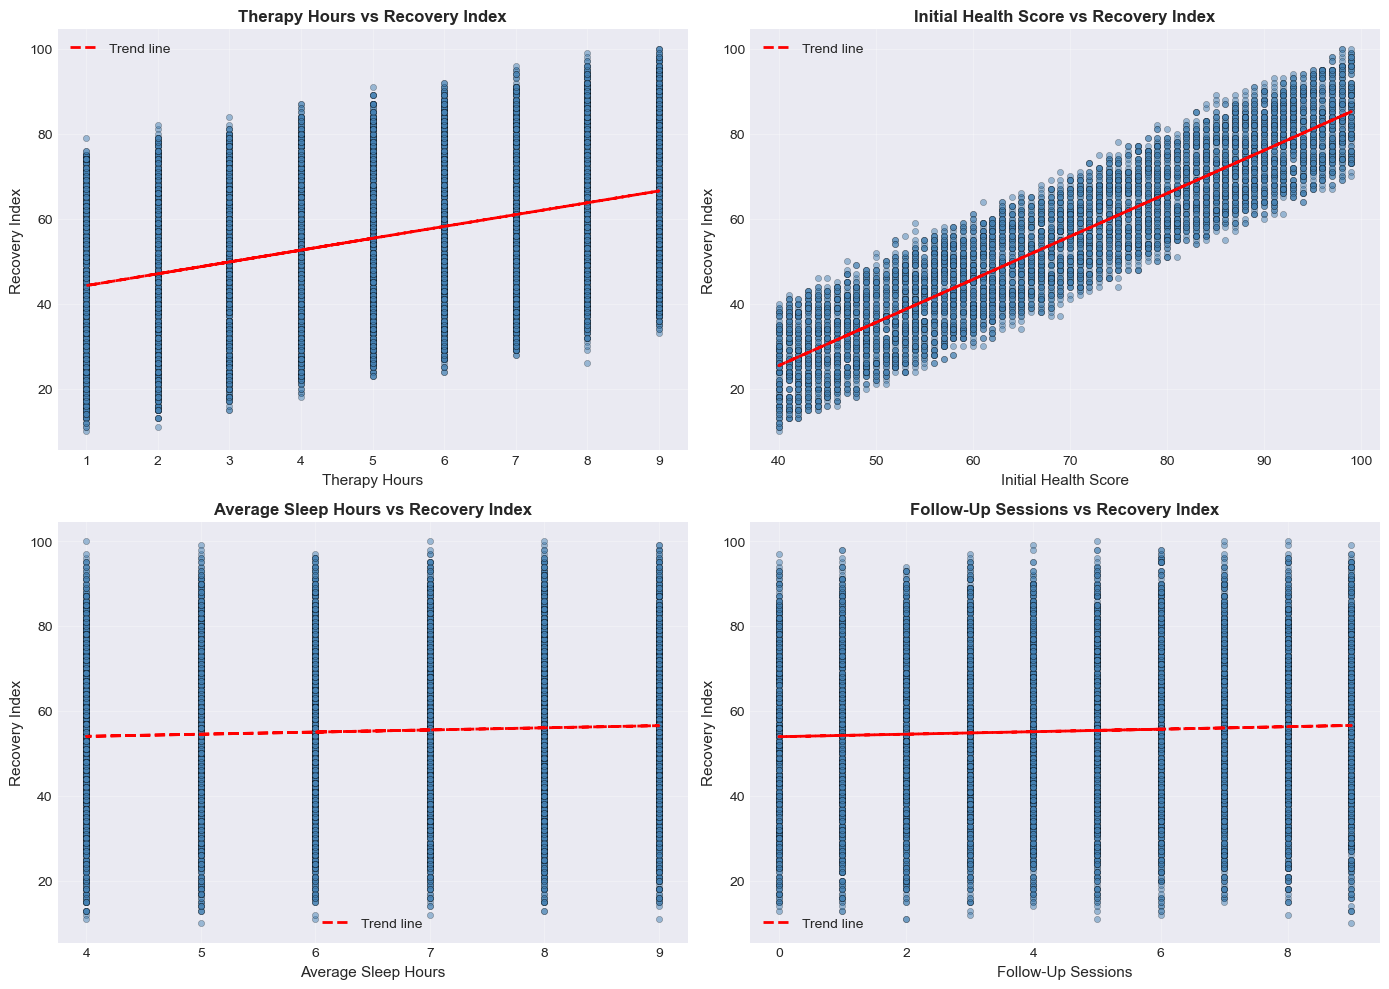

In [13]:
# Scatter plots: Each feature vs Recovery Index
features = ['Therapy Hours', 'Initial Health Score', 'Average Sleep Hours', 'Follow-Up Sessions']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, feature in enumerate(features):
    axes[idx].scatter(train_df[feature], train_df['Recovery Index'], 
                     alpha=0.5, s=20, color='steelblue', edgecolors='black', linewidth=0.3)
    axes[idx].set_xlabel(feature, fontsize=11)
    axes[idx].set_ylabel('Recovery Index', fontsize=11)
    axes[idx].set_title(f'{feature} vs Recovery Index', fontsize=12, fontweight='bold')
    axes[idx].grid(alpha=0.3)
    
    # Add trend line
    z = np.polyfit(train_df[feature], train_df['Recovery Index'], 1)
    p = np.poly1d(z)
    axes[idx].plot(train_df[feature], p(train_df[feature]), 
                  "r--", linewidth=2, label='Trend line')
    axes[idx].legend()

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

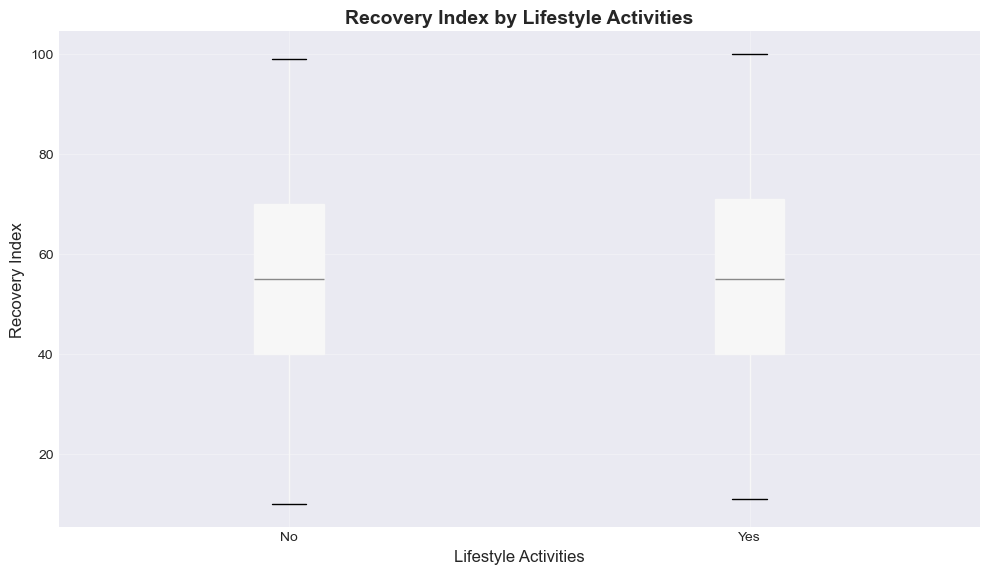

RECOVERY INDEX STATISTICS BY LIFESTYLE ACTIVITIES
                       count   mean    std   min   25%   50%   75%    max
Lifestyle Activities                                                     
No                    4043.0  54.96  19.10  10.0  40.0  55.0  70.0   99.0
Yes                   3957.0  55.67  19.31  11.0  40.0  55.0  71.0  100.0


In [14]:
# Box plot: Lifestyle Activities vs Recovery Index
plt.figure(figsize=(10, 6))
train_df.boxplot(column='Recovery Index', by='Lifestyle Activities', 
                 patch_artist=True, figsize=(10, 6))
plt.suptitle('')
plt.title('Recovery Index by Lifestyle Activities', fontsize=14, fontweight='bold')
plt.xlabel('Lifestyle Activities', fontsize=12)
plt.ylabel('Recovery Index', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Statistics by Lifestyle Activities
print("=" * 80)
print("RECOVERY INDEX STATISTICS BY LIFESTYLE ACTIVITIES")
print("=" * 80)
print(train_df.groupby('Lifestyle Activities')['Recovery Index'].describe())

### 3.6 Outlier Detection

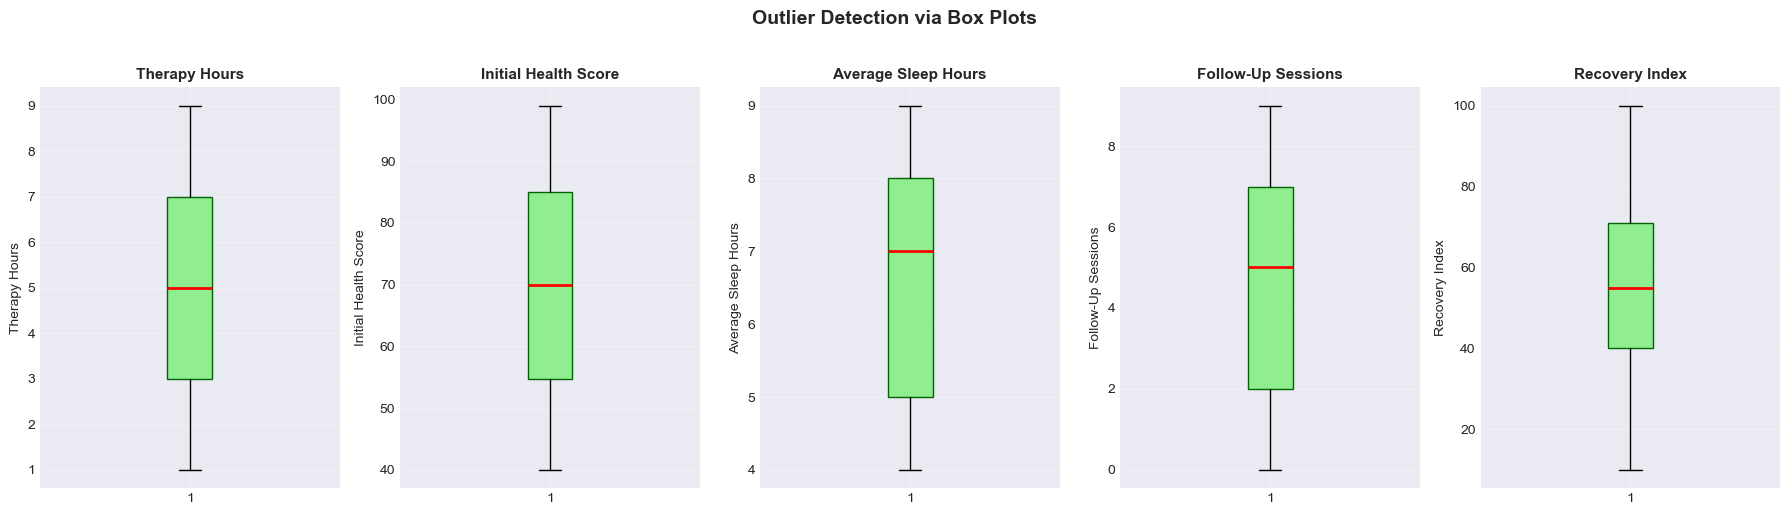

OUTLIER ANALYSIS (IQR METHOD)
Therapy Hours: 0 outliers (0.00%)
Initial Health Score: 0 outliers (0.00%)
Average Sleep Hours: 0 outliers (0.00%)
Follow-Up Sessions: 0 outliers (0.00%)
Recovery Index: 0 outliers (0.00%)


In [15]:
# Box plots for outlier detection
features_to_check = ['Therapy Hours', 'Initial Health Score', 'Average Sleep Hours', 
                     'Follow-Up Sessions', 'Recovery Index']

fig, axes = plt.subplots(1, 5, figsize=(18, 5))

for idx, feature in enumerate(features_to_check):
    axes[idx].boxplot(train_df[feature], vert=True, patch_artist=True,
                     boxprops=dict(facecolor='lightgreen', color='darkgreen'),
                     medianprops=dict(color='red', linewidth=2))
    axes[idx].set_ylabel(feature, fontsize=10)
    axes[idx].set_title(f'{feature}', fontsize=11, fontweight='bold')
    axes[idx].grid(alpha=0.3)

plt.suptitle('Outlier Detection via Box Plots', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Calculate outliers using IQR method
print("=" * 80)
print("OUTLIER ANALYSIS (IQR METHOD)")
print("=" * 80)
for feature in features_to_check:
    Q1 = train_df[feature].quantile(0.25)
    Q3 = train_df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = train_df[(train_df[feature] < lower_bound) | (train_df[feature] > upper_bound)]
    print(f"{feature}: {len(outliers)} outliers ({len(outliers)/len(train_df)*100:.2f}%)")

### 3.7 Pair Plot (Sample)

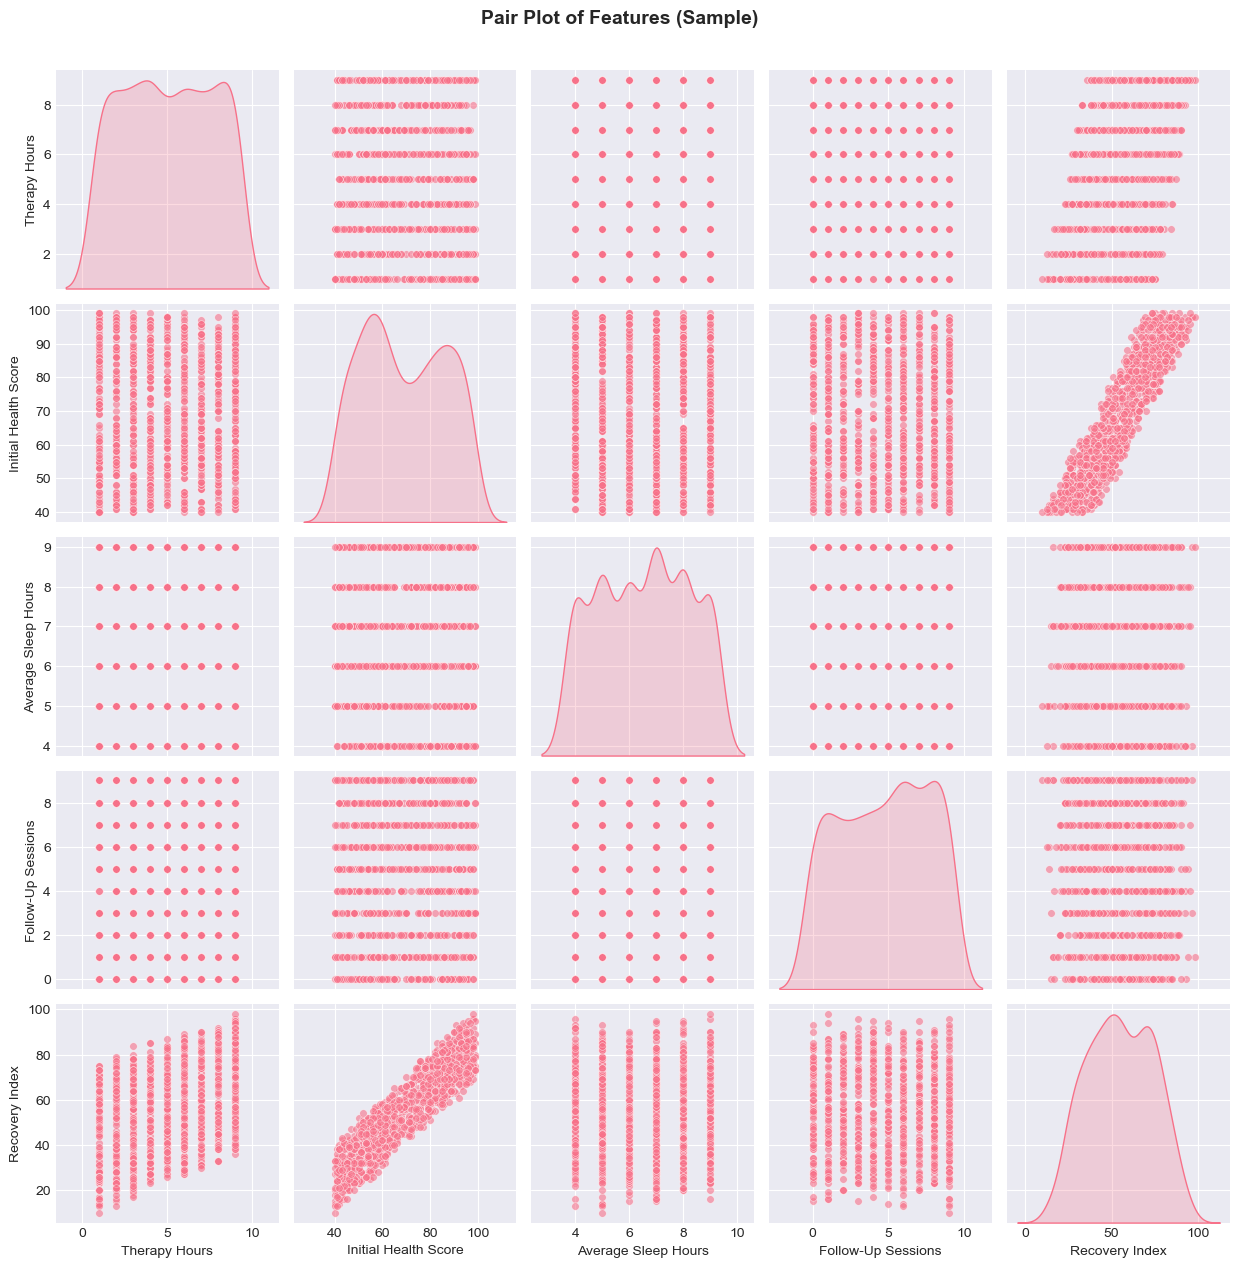

In [16]:
# Pair plot (using a sample for faster rendering)
sample_df = train_df.sample(n=min(1000, len(train_df)), random_state=42)
sns.pairplot(sample_df[['Therapy Hours', 'Initial Health Score', 'Average Sleep Hours', 
                         'Follow-Up Sessions', 'Recovery Index']], 
             diag_kind='kde', plot_kws={'alpha': 0.6, 's': 30}, height=2.5)
plt.suptitle('Pair Plot of Features (Sample)', y=1.01, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

---

## 4. Data Preprocessing

In [17]:
# Prepare data for modeling
print("=" * 80)
print("DATA PREPROCESSING")
print("=" * 80)

# Separate features and target
X = train_df.drop(['Id', 'Recovery Index'], axis=1)
y = train_df['Recovery Index']

# Encode categorical variable (Lifestyle Activities)
label_encoder = LabelEncoder()
X['Lifestyle Activities'] = label_encoder.fit_transform(X['Lifestyle Activities'])

print("✅ Lifestyle Activities encoded (No=0, Yes=1)")
print(f"\nFeature columns: {X.columns.tolist()}")
print(f"Target variable: Recovery Index")
print(f"\nFeature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

DATA PREPROCESSING
✅ Lifestyle Activities encoded (No=0, Yes=1)

Feature columns: ['Therapy Hours', 'Initial Health Score', 'Lifestyle Activities', 'Average Sleep Hours', 'Follow-Up Sessions']
Target variable: Recovery Index

Feature matrix shape: (8000, 5)
Target vector shape: (8000,)


In [18]:
# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("=" * 80)
print("TRAIN-VALIDATION SPLIT")
print("=" * 80)
print(f"Training set: {X_train.shape[0]} samples ({(X_train.shape[0]/X.shape[0])*100:.1f}%)")
print(f"Validation set: {X_val.shape[0]} samples ({(X_val.shape[0]/X.shape[0])*100:.1f}%)")

TRAIN-VALIDATION SPLIT
Training set: 6400 samples (80.0%)
Validation set: 1600 samples (20.0%)


In [19]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

print("=" * 80)
print("FEATURE SCALING (StandardScaler)")
print("=" * 80)
print("✅ Features scaled to have mean=0 and std=1")
print(f"\nScaled training set shape: {X_train_scaled.shape}")
print(f"Scaled validation set shape: {X_val_scaled.shape}")

FEATURE SCALING (StandardScaler)
✅ Features scaled to have mean=0 and std=1

Scaled training set shape: (6400, 5)
Scaled validation set shape: (1600, 5)


---

## 5. Baseline Model - Linear Regression

### 5.1 Model Training

In [20]:
# Train Linear Regression model
print("=" * 80)
print("TRAINING LINEAR REGRESSION MODEL")
print("=" * 80)

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

print("✅ Model trained successfully!")
print(f"\nModel coefficients:")
for feature, coef in zip(X.columns, lr_model.coef_):
    print(f"  {feature:25s}: {coef:8.4f}")
print(f"\nIntercept: {lr_model.intercept_:.4f}")

TRAINING LINEAR REGRESSION MODEL
✅ Model trained successfully!

Model coefficients:
  Therapy Hours            :   7.3859
  Initial Health Score     :  17.6275
  Lifestyle Activities     :   0.3030
  Average Sleep Hours      :   0.8144
  Follow-Up Sessions       :   0.5549

Intercept: 55.3294


### 5.2 Model Evaluation

In [21]:
# Make predictions
y_train_pred = lr_model.predict(X_train_scaled)
y_val_pred = lr_model.predict(X_val_scaled)

# Calculate metrics
train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)

# Display results
print("=" * 80)
print("MODEL PERFORMANCE METRICS")
print("=" * 80)
print(f"\n{'Metric':<20} {'Training':>15} {'Validation':>15}")
print("-" * 80)
print(f"{'R² Score':<20} {train_r2:>15.4f} {val_r2:>15.4f}")
print(f"{'RMSE':<20} {train_rmse:>15.4f} {val_rmse:>15.4f}")
print(f"{'MAE':<20} {train_mae:>15.4f} {val_mae:>15.4f}")
print("=" * 80)

# Check for overfitting
if abs(train_r2 - val_r2) < 0.05:
    print("\n✅ Model is well-balanced (no significant overfitting)")
else:
    print(f"\n⚠️ Potential overfitting detected (R² difference: {abs(train_r2 - val_r2):.4f})")

MODEL PERFORMANCE METRICS

Metric                      Training      Validation
--------------------------------------------------------------------------------
R² Score                      0.9886          0.9891
RMSE                          2.0508          2.0064
MAE                           1.6248          1.5975

✅ Model is well-balanced (no significant overfitting)


### 5.3 Cross-Validation

In [22]:
# Perform 5-fold cross-validation
print("=" * 80)
print("5-FOLD CROSS-VALIDATION")
print("=" * 80)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(lr_model, X_train_scaled, y_train, 
                            cv=kfold, scoring='r2')

print(f"\nCross-validation R² scores: {cv_scores}")
print(f"\nMean CV R² Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
print(f"Min CV R² Score: {cv_scores.min():.4f}")
print(f"Max CV R² Score: {cv_scores.max():.4f}")

5-FOLD CROSS-VALIDATION

Cross-validation R² scores: [0.98907906 0.98830697 0.98842597 0.98818393 0.98870017]

Mean CV R² Score: 0.9885 (+/- 0.0006)
Min CV R² Score: 0.9882
Max CV R² Score: 0.9891


### 5.4 Visualization of Results

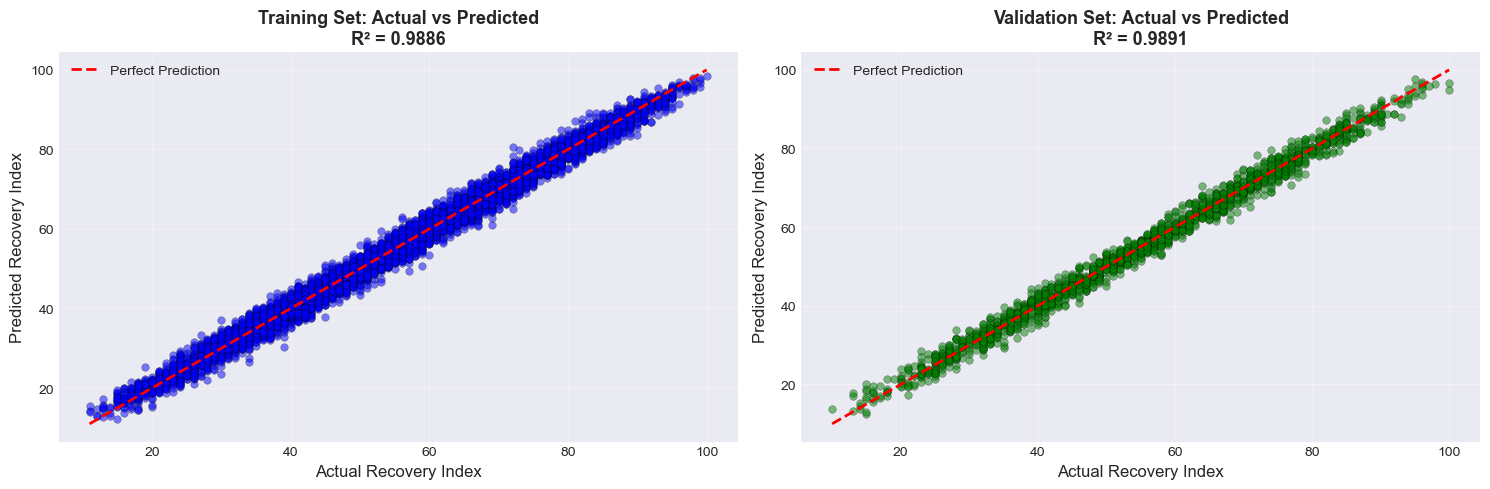

In [23]:
# Plot: Actual vs Predicted
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Training set
axes[0].scatter(y_train, y_train_pred, alpha=0.5, s=30, color='blue', edgecolors='black', linewidth=0.3)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 
            'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Recovery Index', fontsize=12)
axes[0].set_ylabel('Predicted Recovery Index', fontsize=12)
axes[0].set_title(f'Training Set: Actual vs Predicted\nR² = {train_r2:.4f}', 
                 fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Validation set
axes[1].scatter(y_val, y_val_pred, alpha=0.5, s=30, color='green', edgecolors='black', linewidth=0.3)
axes[1].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 
            'r--', lw=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Recovery Index', fontsize=12)
axes[1].set_ylabel('Predicted Recovery Index', fontsize=12)
axes[1].set_title(f'Validation Set: Actual vs Predicted\nR² = {val_r2:.4f}', 
                 fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

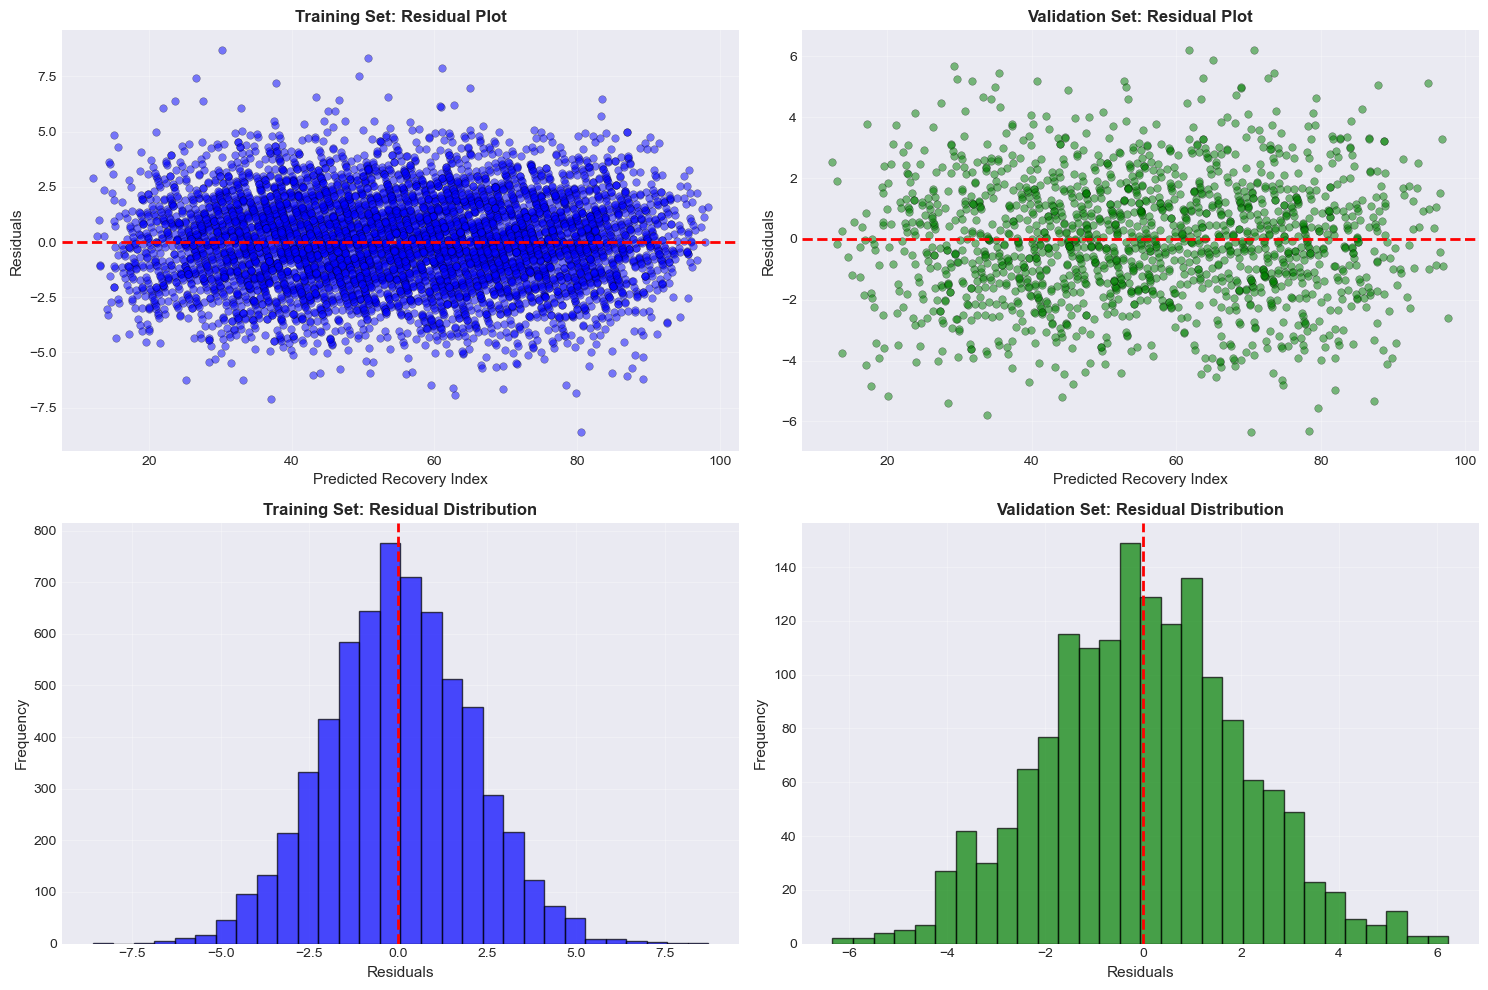

In [24]:
# Residual Analysis
residuals_train = y_train - y_train_pred
residuals_val = y_val - y_val_pred

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Training residuals vs predicted
axes[0, 0].scatter(y_train_pred, residuals_train, alpha=0.5, s=30, color='blue', edgecolors='black', linewidth=0.3)
axes[0, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Predicted Recovery Index', fontsize=11)
axes[0, 0].set_ylabel('Residuals', fontsize=11)
axes[0, 0].set_title('Training Set: Residual Plot', fontsize=12, fontweight='bold')
axes[0, 0].grid(alpha=0.3)

# Validation residuals vs predicted
axes[0, 1].scatter(y_val_pred, residuals_val, alpha=0.5, s=30, color='green', edgecolors='black', linewidth=0.3)
axes[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Predicted Recovery Index', fontsize=11)
axes[0, 1].set_ylabel('Residuals', fontsize=11)
axes[0, 1].set_title('Validation Set: Residual Plot', fontsize=12, fontweight='bold')
axes[0, 1].grid(alpha=0.3)

# Histogram of training residuals
axes[1, 0].hist(residuals_train, bins=30, color='blue', edgecolor='black', alpha=0.7)
axes[1, 0].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Residuals', fontsize=11)
axes[1, 0].set_ylabel('Frequency', fontsize=11)
axes[1, 0].set_title('Training Set: Residual Distribution', fontsize=12, fontweight='bold')
axes[1, 0].grid(alpha=0.3)

# Histogram of validation residuals
axes[1, 1].hist(residuals_val, bins=30, color='green', edgecolor='black', alpha=0.7)
axes[1, 1].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel('Residuals', fontsize=11)
axes[1, 1].set_ylabel('Frequency', fontsize=11)
axes[1, 1].set_title('Validation Set: Residual Distribution', fontsize=12, fontweight='bold')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

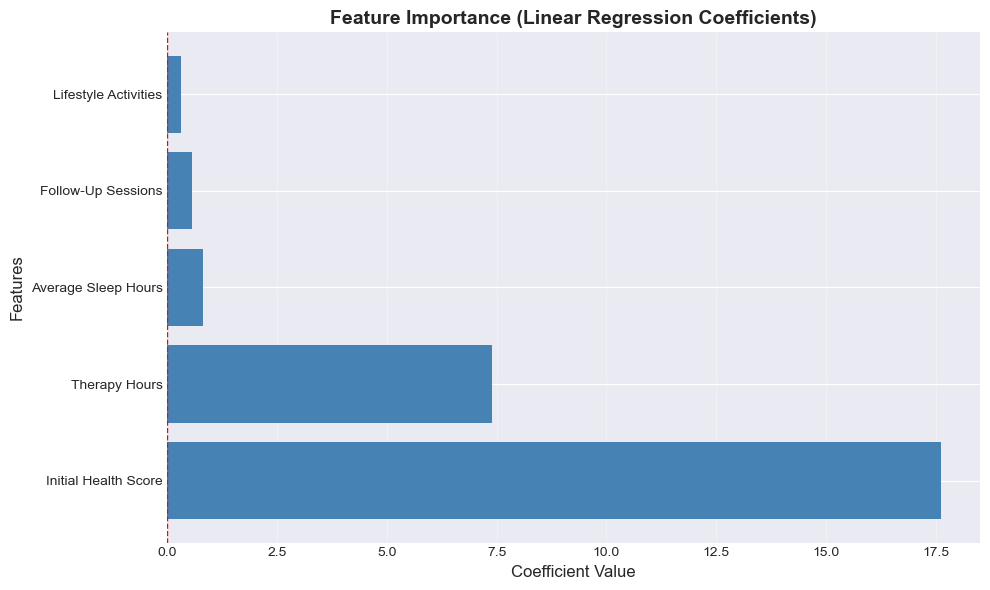

FEATURE IMPORTANCE
                Feature  Coefficient
1  Initial Health Score        17.63
0         Therapy Hours         7.39
3   Average Sleep Hours         0.81
4    Follow-Up Sessions         0.55
2  Lifestyle Activities         0.30


In [25]:
# Feature importance (based on coefficient magnitude)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_,
    'Abs_Coefficient': np.abs(lr_model.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color='steelblue')
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importance (Linear Regression Coefficients)', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("=" * 80)
print("FEATURE IMPORTANCE")
print("=" * 80)
print(feature_importance[['Feature', 'Coefficient']])

---

## 6. Predictions on Test Set

In [26]:
# Prepare test data
X_test = test_df.drop('Id', axis=1)
X_test['Lifestyle Activities'] = label_encoder.transform(X_test['Lifestyle Activities'])

# Scale test data
X_test_scaled = scaler.transform(X_test)

# Make predictions
test_predictions = lr_model.predict(X_test_scaled)

print("=" * 80)
print("TEST SET PREDICTIONS")
print("=" * 80)
print(f"✅ Predictions generated for {len(test_predictions)} test samples")
print(f"\nPrediction statistics:")
print(f"  Mean: {test_predictions.mean():.2f}")
print(f"  Std: {test_predictions.std():.2f}")
print(f"  Min: {test_predictions.min():.2f}")
print(f"  Max: {test_predictions.max():.2f}")

TEST SET PREDICTIONS
✅ Predictions generated for 2000 test samples

Prediction statistics:
  Mean: 54.96
  Std: 19.02
  Min: 12.51
  Max: 97.57


In [27]:
# Create submission file
submission = pd.DataFrame({
    'Id': test_df['Id'],
    'Recovery Index': test_predictions
})

# Save to CSV
submission.to_csv('baseline_linear_regression_submission.csv', index=False)

print("=" * 80)
print("SUBMISSION FILE CREATED")
print("=" * 80)
print("✅ File saved: baseline_linear_regression_submission.csv")
print(f"\nFirst 10 predictions:")
display(submission.head(10))

SUBMISSION FILE CREATED
✅ File saved: baseline_linear_regression_submission.csv

First 10 predictions:


,Id,Recovery Index
0,6253,54.71
1,4685,22.63
2,1732,47.92
3,4743,31.31
4,4522,43.01
5,6341,59.08
6,577,45.89
7,5203,86.46
8,6364,37.73
9,440,72.06


---

## 7. Summary & Next Steps

### 📊 Baseline Model Performance
- **Validation R² Score:** Check the value above
- **Validation RMSE:** Check the value above
- **Model Type:** Linear Regression with StandardScaler

### 🔍 Key Insights from EDA
1. Identify which features have the strongest correlation with Recovery Index
2. Check if there are outliers that need treatment
3. Analyze the relationship between Lifestyle Activities and recovery

### 🚀 Next Steps for Improvement
1. **Try different models:**
   - Random Forest
   - XGBoost / LightGBM
   - Gradient Boosting
   - Ridge / Lasso Regression

2. **Feature Engineering:**
   - Create interaction features (e.g., Therapy Hours × Initial Health Score)
   - Polynomial features
   - Binning continuous variables

3. **Hyperparameter Tuning:**
   - Grid Search or Random Search
   - Cross-validation with different folds

4. **Ensemble Methods:**
   - Voting Regressor
   - Stacking
   - Blending

5. **Advanced Preprocessing:**
   - Try different scalers (MinMaxScaler, RobustScaler)
   - Handle outliers (remove, cap, or transform)
   - Feature selection techniques

**Remember:** Grading depends on the quality and variety of experiments, not just the Kaggle score! 🎯